## Лабораторная работа №1 | Вариант 5

Выполнил: Прокофьев А.Р. 301

### 1. Numpy

In [4]:
import numpy as np

1. Создайте единичную матрицу размером 3х3

In [21]:
identity_matrix = np.eye(3)
print(identity_matrix)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


2. Создайте кастомный dtype который описывает цвет состоящий из 4х unsigned bytes(RGBA пиксель)

In [22]:
color_dtype = np.dtype([("R", np.uint8), ("G", np.uint8), ("B", np.uint8), ("A", np.uint8)])
print(color_dtype)

[('R', 'u1'), ('G', 'u1'), ('B', 'u1'), ('A', 'u1')]


3. Как игнорировать все numpy warnings(не рекомендуем к использованию)?

In [23]:
import warnings
warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)

4. Создайте случайный вектор размера 10 и отсортируйте его

In [24]:
random_vector = np.random.rand(10)
sorted_vector = np.sort(random_vector)
print(sorted_vector)

[0.13712304 0.27402257 0.36995369 0.5505368  0.57550172 0.626784
 0.70240944 0.93629987 0.94893638 0.99805162]


5. Создайте read-only массив(неизменяемый)

In [25]:
read_only_array = np.array([1, 2, 3])
read_only_array.flags.writeable = False
print(read_only_array)

[1 2 3]


6. Рассмотрим случайную матрицу размером 10х2, представляющую декартовы координаты, преобразуем их в полярные координаты

In [26]:
cartesian_coords = np.random.rand(10, 2)
x, y = cartesian_coords[:, 0], cartesian_coords[:, 1]
r = np.sqrt(x**2 + y**2)
theta = np.arctan2(y, x)
polar_coords = np.column_stack((r, theta))
print(polar_coords)

[[0.75045572 0.23911766]
 [0.93723922 1.16225792]
 [0.72916138 0.97222408]
 [1.11828181 0.51845872]
 [0.80970189 1.26823901]
 [0.48712198 1.2072781 ]
 [0.87626687 1.21384177]
 [0.39552782 0.39506602]
 [1.10463079 0.98093256]
 [0.98132459 0.88027759]]


7. Создайте структурированный массив с координатами x и y, охватывающий область [0,1]x[0,1]

In [27]:
grid_shape = (5, 5)
structured_array = np.zeros(grid_shape, dtype=[('x', float), ('y', float)])
structured_array['x'], structured_array['y'] = np.meshgrid(np.linspace(0, 1, grid_shape[0]), np.linspace(0, 1, grid_shape[1]))
print(structured_array)

[[(0.  , 0.  ) (0.25, 0.  ) (0.5 , 0.  ) (0.75, 0.  ) (1.  , 0.  )]
 [(0.  , 0.25) (0.25, 0.25) (0.5 , 0.25) (0.75, 0.25) (1.  , 0.25)]
 [(0.  , 0.5 ) (0.25, 0.5 ) (0.5 , 0.5 ) (0.75, 0.5 ) (1.  , 0.5 )]
 [(0.  , 0.75) (0.25, 0.75) (0.5 , 0.75) (0.75, 0.75) (1.  , 0.75)]
 [(0.  , 1.  ) (0.25, 1.  ) (0.5 , 1.  ) (0.75, 1.  ) (1.  , 1.  )]]


8. Учитывая два массива X и Y, постройте матрицу Коши $C$ ($C_{ij} =\frac{1}{x_i - y_j}$)

In [28]:
x = np.random.normal(size=(5))
y = np.random.normal(size=(5))
cauchy_matrix = 1.0 / (x[:, None] - y)
print(cauchy_matrix)

[[ -0.64348094  -0.30534146  -0.47121189   0.75261097  20.35470998]
 [-15.9354913   -0.56062376  -1.585055     0.35460964   0.64917223]
 [ -1.06284531  -0.37567925  -0.66268586   0.51496366   1.50987706]
 [  3.05233954  -0.71769121  -4.15761729   0.3114903    0.51792169]
 [  1.81736008  -0.854171   -55.89327868   0.29129008   0.46437653]]


9. Как конвертировать массив float(32 bit) к массиву целых чисел (integer 32 bit) in place?

In [29]:
x = np.random.normal(size=(5)).astype(np.float32)
x[:] = x.astype(np.int32)
print(x)

[-1.  0.  0.  0.  0.]


10. Как случайно заменить p элементов в 2D массиве?

In [32]:
array_2d = np.random.randint(0, 10, (5, 5))
p = 5
indices = np.random.choice(array_2d.size, p, replace=False)
array_2d.flat[indices] = -1  # Например, заменяем на -1
print(array_2d)

[[ 5  0 -1  8  7]
 [-1 -1 -1  6  1]
 [ 5  5  9  7  3]
 [ 9  4  6  5 -1]
 [ 5  7  7  5  6]]


### 2. Pandas

Найдите ответы на вопросы или выполните действия с предложенным датасетом

Классический начальный набор данных - данные пассажиров титаника.

Файл: `data.csv`

```
PassangerId - уникальный номер пассажира
Survived - выжил человек или нет
Pclass - класс обслуживания
Name - имя человека, обращение к ней/нему
Sex - пол человека
Age - возраст на момент крушения
SibSp - количество братьев и сестер / супругов на борту "Титаника"
Parch - количество родителей / детей на борту "Титаника"
Ticket - номер билета
Fare - стоимость проезда для пассажиров
Cabin - каюта
Embarked - причал отбытия. C = Cherbourg Q = Queenstown S = Southampton
```

In [19]:
import pandas as pd

In [33]:

df = pd.read_csv("data.csv")
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


1. Узнайте сколько было на борту человек

In [35]:
pas_number = df.shape[0]

print(pas_number)

891


2. Какой медианный и средний возраста пассажиров

In [36]:
mean_age = df["Age"].mean()
median_age = df["Age"].median()

print(median_age)
print(mean_age)

28.0
29.69911764705882


3. Посчитайте процент выживаемости детей(до 16 лет) и взрослых

In [37]:
children_survived = df[df["Age"] < 16]["Survived"].mean() * 100
adults_survived = df[df["Age"] >= 16]["Survived"].mean() * 100

print(children_survived)
print(adults_survived)

59.036144578313255
38.193343898573694


4. Верна ли гипотеза, что женщины и дети сажались в шлюпки первыми и выживали больше?

In [46]:
women_survival_rate = df[df['Sex'] == 'female']['Survived'].mean() * 100
df['IsChild'] = df['Age'] < 16
children_survival_rate = df[df['IsChild']]['Survived'].mean() * 100
men_survival_rate = df[df['Sex'] == 'male']['Survived'].mean() * 100
print(f"Процент выживаемости женщин: {women_survival_rate:.2f}%, мужчин: {men_survival_rate:.2f}%")

#Да, гипотеза верна

Процент выживаемости женщин: 74.20%, мужчин: 18.89%


5. Зависит ли выживаемость от класса обслуживания?

In [47]:
survival_by_class = df.groupby('Pclass')['Survived'].mean() * 100
print("Процент выживаемости по классам:")
print(survival_by_class)

#Да, зависит - чем лучше класс, тем больше шансов выжить

Процент выживаемости по классам:
Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64


6. Посчитайте средний возраст умерших женщин и мужчин

In [42]:
average_age_deceased = df[df['Survived'] == 0].groupby('Sex')['Age'].mean()
print(average_age_deceased)


Sex
female    25.046875
male      31.618056
Name: Age, dtype: float64


7. Различается ли процент выживаемости пассажиров с хотя бы одним родственником на борту и одиночек?

In [48]:
has_family = (df['SibSp'] + df['Parch']) > 0
survival_with_family = df[has_family]['Survived'].mean() * 100
survival_solo = df[~has_family]['Survived'].mean() * 100
print(f"с родственниками: {survival_with_family:.2f}%, одиночек: {survival_solo:.2f}%")

#Да, отличается - у пассажиров с родственником (-ами) она выше


с родственниками: 50.56%, одиночек: 30.35%


8. Различается ли средняя стоимость билета у умерших и выживших пассажиров?

In [51]:
average_fare_by_survival = df.groupby('Survived')['Fare'].mean()
print("Средняя стоимость билета:")
print(average_fare_by_survival)

#Да, у умерших она меньше

Средняя стоимость билета:
Survived
0    22.117887
1    48.395408
Name: Fare, dtype: float64


9. Выведите максимальный и минимальный возраст выживших пассажиров во 2 классе обслуживания

In [53]:
survived_second_class = df[(df['Survived'] == 1) & (df['Pclass'] == 2)]['Age']
max_age_second_class = survived_second_class.max()
min_age_second_class = survived_second_class.min()
print(f"Макс: {max_age_second_class}, мин: {min_age_second_class}")


Макс: 62.0, мин: 0.67


10. Подтвердите или опровергните гипотезу: молодым мужчинам(от 18 лет) выжить легче, чем более взрослым

In [55]:
men_survival_rate_young = df[(df['Sex'] == 'male') & (df['Age'] >= 18)]['Survived'].mean() * 100
older_men_survival_rate = df[(df['Sex'] == 'male') & (df['Age'] > 18)]['Survived'].mean() * 100
print(f"Выживаемость молодых мужчин (>=18): {men_survival_rate_young:.2f}%, более старших: {older_men_survival_rate:.2f}%")

#Если более взрослые это >18, т.е. от 19, то гипотеза не верна, но я не уловил суть вопроса


Выживаемость молодых мужчин (>=18): 17.72%, более старших: 18.06%


### 3. Визуализация

Используя библиотеки matplotlib/sns/plotly/pandas и набор данных представленный ранее визуализируйте

1. Постройте гистограмму распределения возростов пассажиров

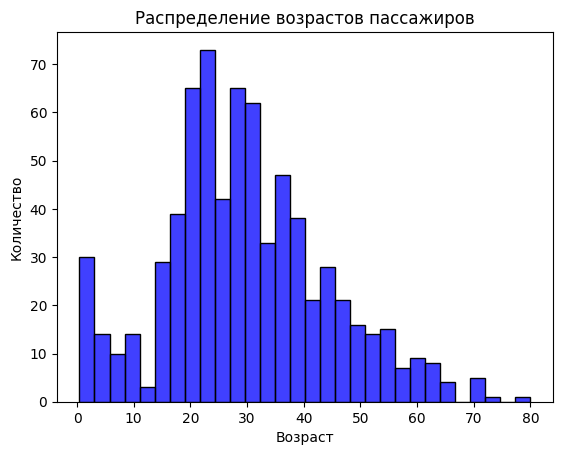

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.histplot(df['Age'], bins=30, kde=False, color='blue')
plt.title('Распределение возрастов пассажиров')
plt.xlabel('Возраст')
plt.ylabel('Количество')
plt.show()

2. Постройте гистограммы распределения цен для пассажиров разных классов

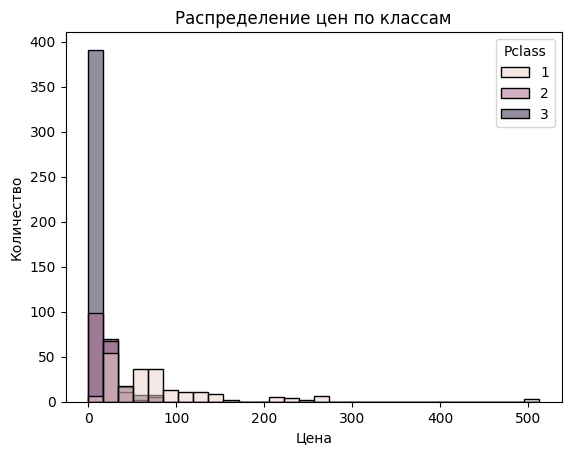

In [60]:
sns.histplot(data=df, x='Fare', hue='Pclass', kde=False, bins=30)
plt.title('Распределение цен по классам')
plt.xlabel('Цена')
plt.ylabel('Количество')
plt.show()

3. Постройте зависимость цены от возраста пассажира

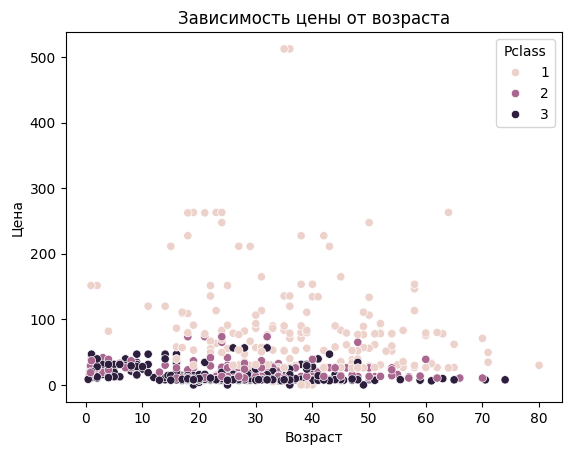

In [61]:
sns.scatterplot(data=df, x='Age', y='Fare', hue='Pclass')
plt.title('Зависимость цены от возраста')
plt.xlabel('Возраст')
plt.ylabel('Цена')
plt.show()


4. Постройте box plot отображающий распределение цен на билеты в разных классах

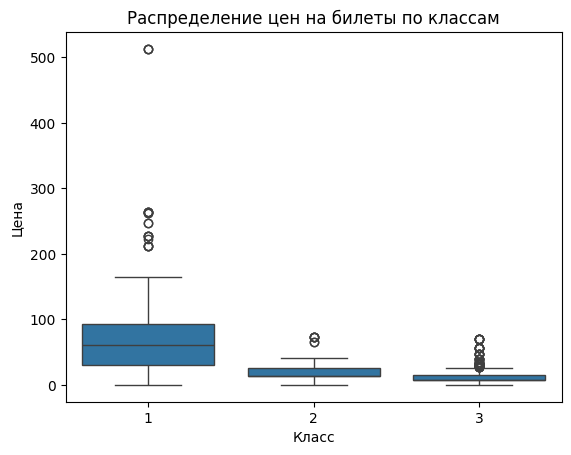

In [62]:
sns.boxplot(data=df, x='Pclass', y='Fare')
plt.title('Распределение цен на билеты по классам')
plt.xlabel('Класс')
plt.ylabel('Цена')
plt.show()

5. Визуализируйте распределение долей выживших среди мужчин, женщин и детей(до 16 лет)

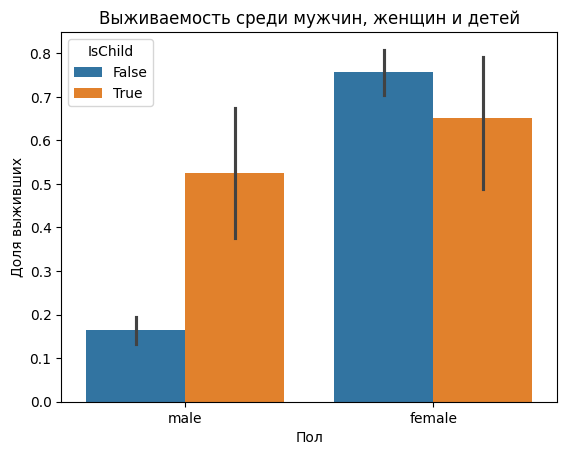

In [63]:
sns.barplot(data=df, x='Sex', y='Survived', hue='IsChild')
plt.title('Выживаемость среди мужчин, женщин и детей')
plt.xlabel('Пол')
plt.ylabel('Доля выживших')
plt.show()


6. Сравните плотности распределения возростов выживших и умерших пассажиров, сделайте выводы

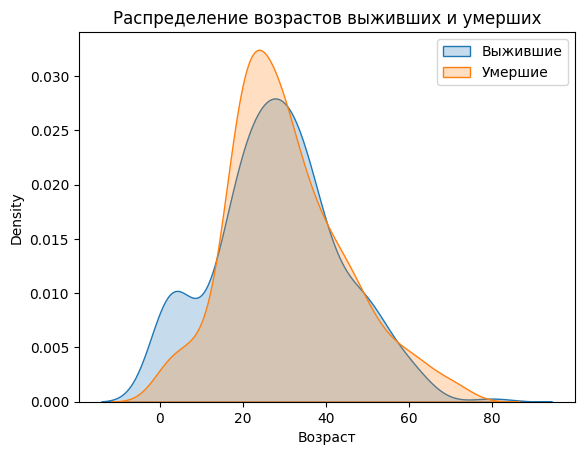

In [66]:
sns.kdeplot(df[df['Survived'] == 1]['Age'], label='Выжившие', fill=True)
sns.kdeplot(df[df['Survived'] == 0]['Age'], label='Умершие', fill=True)
plt.title('Распределение возрастов выживших и умерших')
plt.xlabel('Возраст')
plt.legend()
plt.show()

Дети: Видно, что доля выживших пассажиров до 16 лет значительно выше, чем умерших. Это подтверждает гипотезу о приоритете спасения детей.

Молодые взрослые: Среди этой группы умерших больше, чем выживших. Это может быть связано с тем, что молодые мужчины уступали место в шлюпках женщинам и детям.

Средний и пожилой возраст: График показывает снижение выживаемости с возрастом. Особенно заметно, что пожилые пассажиры (60+) имели низкие шансы на спасение.

7. Постройте круговую диаграмму отображающую выживаемость мужчин и женщин в разных классах обслуживания(визуализация должна быть интуитивно понятная без объяснений, женщины и мужчины соответствующих классов объеденены визуально в одну группу и 2 подгруппы)*

\* Задание на доп. балл

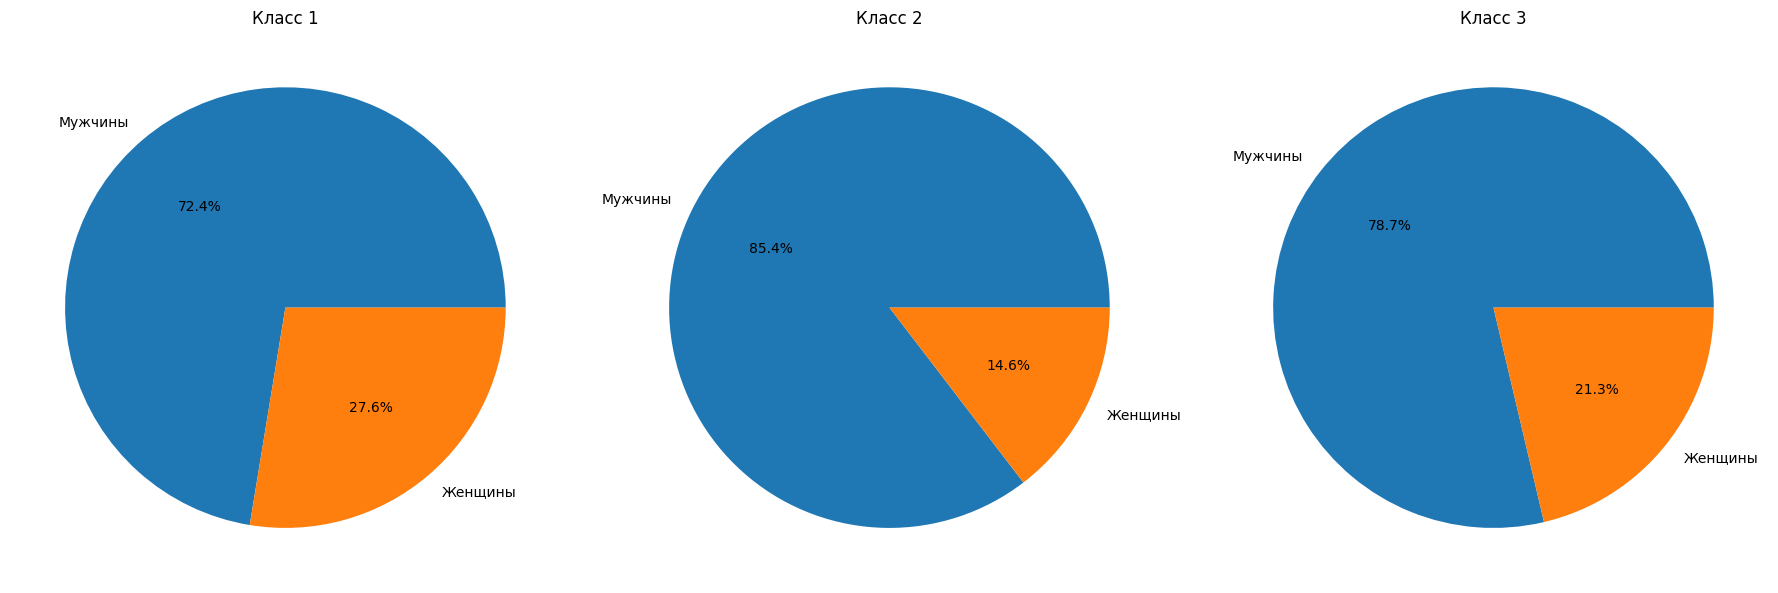

In [71]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
for i, pclass in enumerate([1, 2, 3], start=1):
    class_data = df[df['Pclass'] == pclass]
    survival_rates = class_data.groupby('Sex')['Survived'].mean()
    survival_rates.plot(
        kind='pie',
        autopct='%1.1f%%',
        ax=axes[i-1],
        title=f'Класс {pclass}',
        labels=['Мужчины', 'Женщины'],
        ylabel=''
    )
plt.tight_layout()
plt.show()
